# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# (실습준비) 데이터 불러오기부터

In [1]:
# 학습 데이터 로딩
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# 시각화 한글폰트 설정
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# 경고 메시지 숨기기
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# 학습 데이터 로딩
train_x = pd.read_csv('../data/train_x.csv')
train_y = pd.read_csv('../data/train_y.csv')

# 평가 데이터 로딩
test_x = pd.read_csv('../data/test_x.csv')
test_y = pd.read_csv('../data/test_y.csv')

---

# 1. Machine Learning
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

### 가. LinearRegression 부터 시작해봅시다.

#### [실습문제1] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression 모델 생성 및 학습
model1 = LinearRegression()
model1.fit(train_x, train_y)

# 모델을 사용하여 평가 데이터에 대한 예측 생성
test_y_pred = model1.predict(test_x)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(test_y, test_y_pred))

# R-squared Score 계산
r2 = r2_score(test_y, test_y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

RMSE: 1818.326003935022
R-squared Score: 0.7533024361529467


### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언부스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제2] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [4]:
# 아래에 실습코드를 작성하세요.
from sklearn.ensemble import RandomForestRegressor

# Random Forest 모델 생성 및 학습
model2 = RandomForestRegressor(random_state=1234)
model2.fit(train_x, train_y)

# 모델을 사용하여 평가 데이터에 대한 예측 생성
test_y_pred = model2.predict(test_x)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(test_y, test_y_pred))

# R-squared Score 계산
r2 = r2_score(test_y, test_y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

RMSE: 1625.8258772430822
R-squared Score: 0.8027716121102603


#### [실습문제3] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

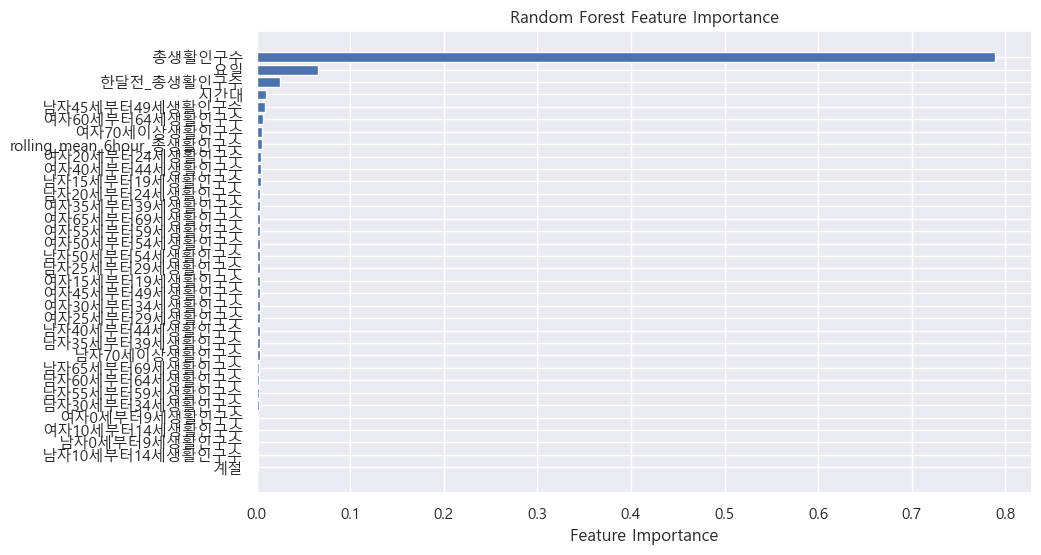

In [5]:
# Feature의 중요도 확인
# Feature Importances 확인
feature_importances = model2.feature_importances_

# 각 특성의 중요도를 DataFrame으로 정리
feature_importance_df = pd.DataFrame({'Feature': train_x.columns, 'Importance': feature_importances})

# 중요도로 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [6]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제4] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting 모델 생성 및 학습
model3 = GradientBoostingRegressor(random_state=1234)
model3.fit(train_x, train_y)

# 모델을 사용하여 평가 데이터에 대한 예측 생성
test_y_pred = model3.predict(test_x)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(test_y, test_y_pred))

# R-squared Score 계산
r2 = r2_score(test_y, test_y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

RMSE: 1614.3312254626608
R-squared Score: 0.8055505782093673


#### [실습문제5] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

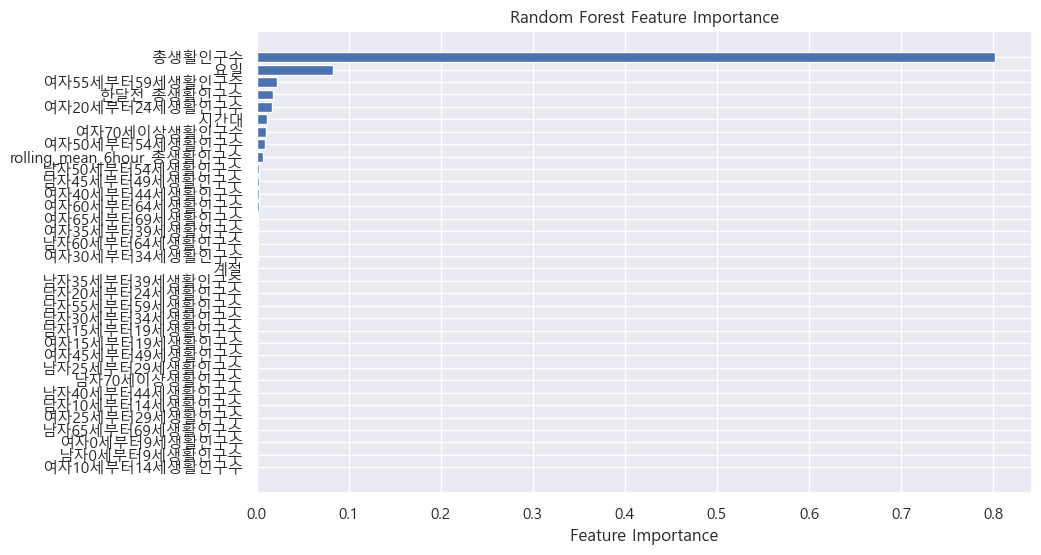

In [8]:

# Feature Importances 확인
feature_importances = model3.feature_importances_

# 각 특성의 중요도를 DataFrame으로 정리
feature_importance_df = pd.DataFrame({'Feature': train_x.columns, 'Importance': feature_importances})

# 중요도로 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [9]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### [실습문제8] 스케일링
* Min Max Scale 함수를 활용하여 스케일링 후 위 모델에 적용하여 보세요. 


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ls = train_x.columns

train_x[ls] = scaler.fit_transform(train_x[ls])
test_x[ls] = scaler.transform(test_x[ls])

In [11]:
display(train_x.head())
display(test_x.head())

,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,...,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,rolling_mean_6hour_총생활인구수,한달전_총생활인구수,계절,요일,시간대
0,0.111151,0.126706,0.126705,0.047331,0.238405,0.188075,0.126944,0.199043,0.103102,0.027272,...,0.144667,0.322774,0.284544,0.426994,0.254265,0.146151,0.160703,0.333333,0.166667,1.0
1,0.107772,0.112086,0.112086,0.051602,0.217762,0.158933,0.129213,0.174432,0.110058,0.035035,...,0.150695,0.337657,0.305395,0.396193,0.271517,0.102899,0.148401,0.333333,0.166667,1.0
2,0.112312,0.124665,0.124665,0.039090,0.232218,0.174252,0.129743,0.186987,0.109472,0.043663,...,0.151717,0.323802,0.292660,0.401683,0.285300,0.107326,0.150233,0.333333,0.166667,1.0
3,0.115583,0.125394,0.125394,0.052912,0.228740,0.176412,0.138324,0.172423,0.112607,0.053098,...,0.167271,0.334033,0.282056,0.441132,0.270084,0.108845,0.157407,0.333333,0.166667,1.0
4,0.135475,0.122837,0.122837,0.067778,0.244855,0.187942,0.160778,0.213808,0.137712,0.076693,...,0.174893,0.351203,0.301929,0.405151,0.274459,0.118342,0.174471,0.333333,0.166667,1.0


,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,...,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,rolling_mean_6hour_총생활인구수,한달전_총생활인구수,계절,요일,시간대
0,0.077331,0.151371,0.151371,0.092366,0.033289,0.051980,0.102349,0.105117,0.269146,0.204232,...,0.108575,0.171260,0.101838,0.294244,0.244985,0.066523,0.124273,0.0,0.0,1.0
1,0.077517,0.140921,0.140921,0.082654,0.017851,0.050468,0.094906,0.117691,0.279744,0.204011,...,0.110170,0.183472,0.100400,0.315225,0.244186,0.070502,0.133146,0.0,0.0,1.0
2,0.083496,0.145138,0.145138,0.096307,0.017291,0.056181,0.101702,0.114920,0.271647,0.208382,...,0.116675,0.183495,0.099604,0.317411,0.250217,0.075482,0.143426,0.0,0.0,1.0
3,0.093490,0.154259,0.154259,0.103030,0.034219,0.081548,0.118031,0.114708,0.275314,0.227749,...,0.122632,0.186784,0.117613,0.306690,0.249642,0.081022,0.144393,0.0,0.0,1.0
4,0.123740,0.151787,0.151787,0.121555,0.043314,0.102420,0.134778,0.141092,0.314175,0.260232,...,0.162705,0.224719,0.143937,0.296405,0.250876,0.096867,0.167087,0.0,0.0,1.0


### 가. LinearRegression 부터 시작해봅시다.

#### [실습문제1] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression 모델 생성 및 학습
model1 = LinearRegression()
model1.fit(train_x, train_y)

# 모델을 사용하여 평가 데이터에 대한 예측 생성
test_y_pred = model1.predict(test_x)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(test_y, test_y_pred))

# R-squared Score 계산
r2 = r2_score(test_y, test_y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

RMSE: 1818.3260039241786
R-squared Score: 0.753302436155889


### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언부스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제2] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [13]:
# 아래에 실습코드를 작성하세요.
from sklearn.ensemble import RandomForestRegressor

# Random Forest 모델 생성 및 학습
model2 = RandomForestRegressor(random_state=1234)
model2.fit(train_x, train_y)

# 모델을 사용하여 평가 데이터에 대한 예측 생성
test_y_pred = model2.predict(test_x)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(test_y, test_y_pred))

# R-squared Score 계산
r2 = r2_score(test_y, test_y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

RMSE: 1625.5578084676597
R-squared Score: 0.8028366454135818


#### [실습문제3] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

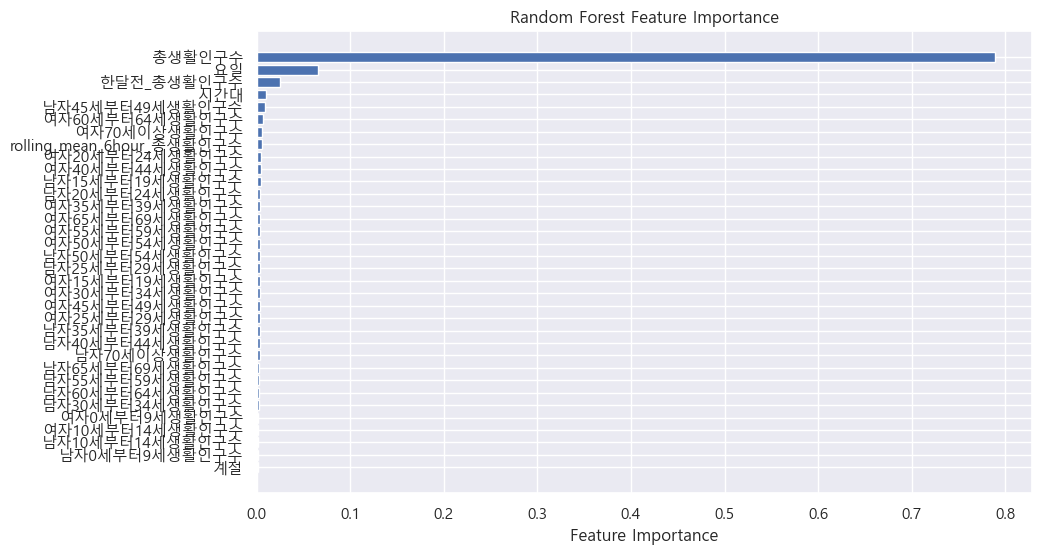

                      Feature  Importance
0                      총생활인구수    0.788632
32                         요일    0.065555
30                 한달전_총생활인구수    0.024606
33                        시간대    0.010392
9             남자45세부터49세생활인구수    0.008935
26            여자60세부터64세생활인구수    0.007317
28               여자70세이상생활인구수    0.006143
29  rolling_mean_6hour_총생활인구수    0.005913
18            여자20세부터24세생활인구수    0.004634
22            여자40세부터44세생활인구수    0.004311
3             남자15세부터19세생활인구수    0.004236
4             남자20세부터24세생활인구수    0.003776
21            여자35세부터39세생활인구수    0.003719
27            여자65세부터69세생활인구수    0.003690
25            여자55세부터59세생활인구수    0.003657
24            여자50세부터54세생활인구수    0.003636
10            남자50세부터54세생활인구수    0.003497
5             남자25세부터29세생활인구수    0.003479
17            여자15세부터19세생활인구수    0.003430
20            여자30세부터34세생활인구수    0.003392
23            여자45세부터49세생활인구수    0.003383
19            여자25세부터29세생활인구수    0.003300
7             남자35세부터39세생활인구수    0

In [14]:
# Feature의 중요도 확인
# Feature Importances 확인
feature_importances = model2.feature_importances_

# 각 특성의 중요도를 DataFrame으로 정리
feature_importance_df = pd.DataFrame({'Feature': train_x.columns, 'Importance': feature_importances})

# 중요도로 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

print( feature_importance_df.sort_values(by='Importance', ascending=False))

In [15]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제4] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting 모델 생성 및 학습
model3 = GradientBoostingRegressor(random_state=1234)
model3.fit(train_x, train_y)

# 모델을 사용하여 평가 데이터에 대한 예측 생성
test_y_pred = model3.predict(test_x)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(test_y, test_y_pred))

# R-squared Score 계산
r2 = r2_score(test_y, test_y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

RMSE: 1614.3312254626608
R-squared Score: 0.8055505782093673


#### [실습문제5] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

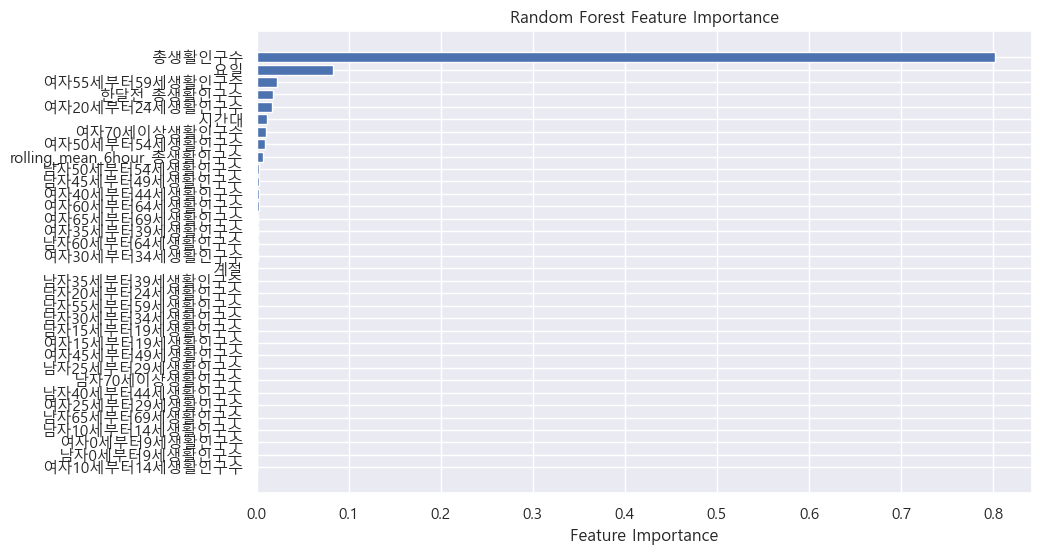

                      Feature  Importance
0                      총생활인구수    0.801701
32                         요일    0.082687
25            여자55세부터59세생활인구수    0.022262
30                 한달전_총생활인구수    0.018326
18            여자20세부터24세생활인구수    0.017048
33                        시간대    0.011274
28               여자70세이상생활인구수    0.010582
24            여자50세부터54세생활인구수    0.008740
29  rolling_mean_6hour_총생활인구수    0.006482
10            남자50세부터54세생활인구수    0.002435
9             남자45세부터49세생활인구수    0.002403
22            여자40세부터44세생활인구수    0.002380
26            여자60세부터64세생활인구수    0.002247
27            여자65세부터69세생활인구수    0.001679
21            여자35세부터39세생활인구수    0.001638
12            남자60세부터64세생활인구수    0.001086
20            여자30세부터34세생활인구수    0.001058
31                         계절    0.000917
7             남자35세부터39세생활인구수    0.000690
4             남자20세부터24세생활인구수    0.000669
11            남자55세부터59세생활인구수    0.000538
6             남자30세부터34세생활인구수    0.000524
3             남자15세부터19세생활인구수    0

In [17]:
# Feature Importances 확인
feature_importances = model3.feature_importances_

# 각 특성의 중요도를 DataFrame으로 정리
feature_importance_df = pd.DataFrame({'Feature': train_x.columns, 'Importance': feature_importances})

# 중요도로 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

print(feature_importance_df.sort_values(by='Importance', ascending=False))

#### 3) Elastic Net
##### 엘라스틱 넷은 L1(Lasso) 및 L2(Ridge) 규제를 결합한 모델로, 두 규제의 장점을 모두 가지며 데이터에 대한 유연한 모델을 생성할 수 있습니다.

#### [실습문제6] 머신러닝_6
* Train과 Test로 나눈 데이터를 기준으로 엘리스틱넷 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [18]:
from sklearn.linear_model import ElasticNet

# ElasticNet 모델 생성 및 학습
elastic_net = ElasticNet(alpha=0.8, l1_ratio=1)
elastic_net.fit(train_x, train_y)

# 모델을 사용하여 평가 데이터에 대한 예측 생성
test_y_pred = elastic_net.predict(test_x)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(test_y, test_y_pred))

# R-squared Score 계산
r2 = r2_score(test_y, test_y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

RMSE: 1816.8837083011358
R-squared Score: 0.7536936418046729


### 라쏘 회귀

In [19]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Lasso 모델 생성 및 학습
lasso = Lasso(alpha=0.9)  # alpha 값은 규제 강도를 나타냅니다
lasso.fit(train_x, train_y)

# 모델을 사용하여 평가 데이터에 대한 예측 생성
test_y_pred = lasso.predict(test_x)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(test_y, test_y_pred))

# R-squared Score 계산
r2 = r2_score(test_y, test_y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")


RMSE: 1816.9598934771425
R-squared Score: 0.7536729852413633


### 서포트 벡터 머신 회귀 (Support Vector Machine Regression) 

In [20]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# SVM 회귀 모델 생성 및 학습
svm_regressor = SVR(kernel='linear', C=1.0, epsilon=0.1)
svm_regressor.fit(train_x, train_y)

# 모델을 사용하여 평가 데이터에 대한 예측 생성
test_y_pred = svm_regressor.predict(test_x)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(test_y, test_y_pred))

# R-squared Score 계산
r2 = r2_score(test_y, test_y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

RMSE: 1877.5516113084982
R-squared Score: 0.7369700941188151


### 인공 신경망 회귀 (Neural Network Regression) 모델

In [21]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 신경망 회귀 모델 생성 및 학습
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001, max_iter=1000, random_state=42)
mlp_regressor.fit(train_x, train_y)

# 모델을 사용하여 평가 데이터에 대한 예측 생성
test_y_pred = mlp_regressor.predict(test_x)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(test_y, test_y_pred))

# R-squared Score 계산
r2 = r2_score(test_y, test_y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

---

# 2. Deep Learning 
## 이번엔 딥러닝 모델링을 해봅시다.

#### [실습문제9] 딥러닝

* tensorflow 라이브러리를 활용한 모델을 자유롭게 만들어보세요.

### 1번 모델

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

input_shape = train_x.shape[1]
# 모델 생성
deep_model1 = keras.Sequential([
    layers.Input(shape=(input_shape)),  # 입력층
    layers.Dense(128, activation='relu'),  # 은닉층 1
    layers.Dense(64, activation='relu'),   # 은닉층 2
    layers.Dense(1, activation='linear')  # 출력층
])

# Early Stopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링할 지표 (검증 데이터의 손실 함수)
    patience=10,  # 지정된 지표가 개선되지 않은 에폭 수
    restore_best_weights=True  # 최적의 모델 가중치로 복원
)

# 모델 컴파일
deep_model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
deep_model1.summary()
deep_model1.fit(train_x, train_y, batch_size=64, epochs=50, validation_data=(test_x, test_y), callbacks=[early_stopping])

deep_pred1 = deep_model1.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, deep_pred1))
mae = mean_absolute_error(test_y, deep_pred1)
r2 = r2_score(test_y, deep_pred1)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared Score: {r2}")

### 2번 모델

In [ ]:
input_shape = train_x.shape[1]
# 모델 생성
deep_model2 = keras.Sequential([
    layers.Input(shape=(input_shape)),  # 입력층
    layers.Dense(128, activation='relu'),  # 은닉층 1
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),   # 은닉층 2
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(1, activation='linear')  # 출력층
])

# Early Stopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링할 지표 (검증 데이터의 손실 함수)
    patience=10,  # 지정된 지표가 개선되지 않은 에폭 수
    restore_best_weights=True  # 최적의 모델 가중치로 복원
)

# 모델 컴파일
optimizer = keras.optimizers.Adam(learning_rate=0.01)
deep_model2.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# 모델 요약 정보 출력
deep_model2.summary()

# 모델 학습
deep_model2.fit(train_x, train_y, batch_size=64, epochs=50, validation_data=(test_x, test_y), callbacks=[early_stopping])

deep_pred2 = deep_model2.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, deep_pred2))
mae = mean_absolute_error(test_y, deep_pred2)
r2 = r2_score(test_y, deep_pred2)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared Score: {r2}")

### 3번 모델

In [ ]:
input_shape = train_x.shape[1]
# 모델 생성
deep_model3 = keras.Sequential([
    layers.Input(shape=(input_shape)),  # 입력층
    layers.Dense(128, activation='tanh'),  # 은닉층 1
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(64, activation='tanh'),   # 은닉층 2
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(32, activation='tanh'),   # 은닉층 2
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(1, activation='linear')  # 출력층
])

# Early Stopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링할 지표 (검증 데이터의 손실 함수)
    patience=10,  # 지정된 지표가 개선되지 않은 에폭 수
    restore_best_weights=True  # 최적의 모델 가중치로 복원
)

# 모델 컴파일
optimizer = keras.optimizers.Adam(learning_rate=0.05)
deep_model3.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# 모델 요약 정보 출력
deep_model3.summary()

# 모델 학습
deep_model3.fit(train_x, train_y, batch_size=32, epochs=100, validation_data=(test_x, test_y), callbacks=[early_stopping])

deep_pred3 = deep_model3.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, deep_pred3))
mae = mean_absolute_error(test_y, deep_pred3)
r2 = r2_score(test_y, deep_pred3)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared Score: {r2}")

### 4번 모델

In [ ]:
input_shape = train_x.shape[1]
# 모델 생성
deep_model4 = keras.Sequential([
    layers.Input(shape=(input_shape)),  # 입력층
    layers.Dense(128, activation='tanh'),  # 은닉층 1
    layers.Dense(128, activation='tanh'),  # 은닉층 1
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),   # 은닉층 2
    layers.Dense(64, activation='relu'),   # 은닉층 2
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),   # 은닉층 2
    layers.Dense(32, activation='relu'),   # 은닉층 2
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(1, activation='linear')  # 출력층
])

# Early Stopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링할 지표 (검증 데이터의 손실 함수)
    patience=10,  # 지정된 지표가 개선되지 않은 에폭 수
    restore_best_weights=True  # 최적의 모델 가중치로 복원
)

# 모델 컴파일
optimizer = keras.optimizers.Adam(learning_rate=0.01)
deep_model4.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# 모델 요약 정보 출력
deep_model4.summary()

# 모델 학습
deep_model4.fit(train_x, train_y, batch_size=64, epochs=100, validation_data=(test_x, test_y), callbacks=[early_stopping])

deep_pred4 = deep_model4.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, deep_pred4))
mae = mean_absolute_error(test_y, deep_pred4)
r2 = r2_score(test_y, deep_pred4)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared Score: {r2}")

### 모델5

In [ ]:
input_shape = train_x.shape[1]
# 모델 생성
deep_model5 = keras.Sequential([
    layers.Input(shape=(input_shape)),  # 입력층
    layers.Dense(128, activation='relu'),  # 은닉층 1
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),   # 은닉층 2
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),   # 은닉층 2
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(6, activation='relu'),   # 은닉층 2
    layers.Dense(1, activation='linear')  # 출력층
])

# Early Stopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링할 지표 (검증 데이터의 손실 함수)
    patience=10,  # 지정된 지표가 개선되지 않은 에폭 수
    restore_best_weights=True  # 최적의 모델 가중치로 복원
)

# 모델 컴파일
optimizer = keras.optimizers.Adam(learning_rate=0.01)
deep_model5.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# 모델 요약 정보 출력
deep_model5.summary()

# 모델 학습
deep_model5.fit(train_x, train_y, batch_size=64, epochs=100, validation_data=(test_x, test_y), callbacks=[early_stopping])

deep_pred5 = deep_model5.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, deep_pred5))
mae = mean_absolute_error(test_y, deep_pred5)
r2 = r2_score(test_y, deep_pred5)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared Score: {r2}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Random Forest 모델 생성
model = RandomForestRegressor(random_state=1234)

# 탐색할 하이퍼파라미터 범위 설정
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 랜덤 서치를 위한 설정
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=1234)

# 랜덤 서치 수행
random_search.fit(train_x, train_y)

# 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", random_search.best_params_)

# 최적 모델 추출
best_model = random_search.best_estimator_

# 최적 모델을 사용하여 평가 데이터에 대한 예측 생성
test_y_pred = best_model.predict(test_x)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(test_y, test_y_pred))

# R-squared Score 계산
r2 = r2_score(test_y, test_y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")
